# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Смирнов Иван и Позолотин Константин. Вариант №5.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

КОСТЯ СДЕЛАЙ)))

Приводятся основные теоретические положения для данной практической работы: определения, формулы в стиле $ \LaTeX $ etc. **Данный пункт является обязательным!**

Здесь и далее: при оформлении формул $ \LaTeX $ просьба не использовать русские буквы, поскольку возможно некорректное отображение при загрузке на Github.

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

###Единичный цифровой импульс

настройка значений переменных программы

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

N_br = 5
N = 30 + N_br % 5
T = 0.0005 * (1 + N_br % 3)
a = (-1)**N_br * (0.8 + 0.005 * (N_br % 20))
C = 1 + N_br % 5
w0 = np.pi / (6 + N_br % 5)
m = 5 + N_br % 5

In [5]:
print(f'N_br:\t\t{N_br}\nN:\t\t{N}\nT:\t\t{T}\na:\t\t'
      f'{a}\nC:\t\t{C}\nw0:\t\t{w0}\nm:\t\t{m}\n')

N_br:		5
N:		30
T:		0.0015
a:		-0.8250000000000001
C:		1
w0:		0.5235987755982988
m:		5



единичный цифровой импульс с выделенной точкой посередине:

In [6]:
imp = signal.unit_impulse(N, idx='mid')

построение графика на дискретном времени:

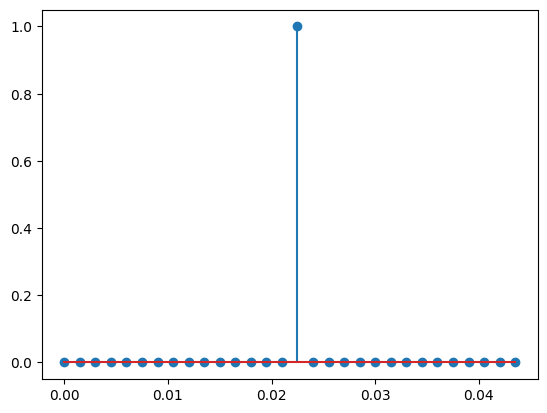

In [7]:
plt.stem(np.arange(N)*T, imp)
plt.show()

построение графика на дискретном нормированном времени:

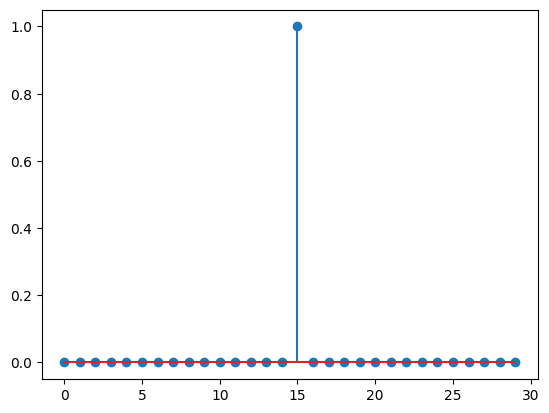

In [8]:
plt.stem(np.arange(N), imp)
plt.show()

a. Взаимосвязь между дискретным и дискретным нормированным временем:

дискретное нормированное время, это дискретное время с периодом дескритизации $Т = 1$

b. Различие между единичным цифровым импульсом и дельта-функцией

в выделенной точке единичный цифровой импульс равен единице, а дельта-функция бесконечности

### Дискретный единичный скачок

дискретный единичный скачок с выделенной точкой посередине:

In [9]:
step = np.array([0 if x < N//2 else 1 for x in range(N)])

построение графика на дискретном времени:

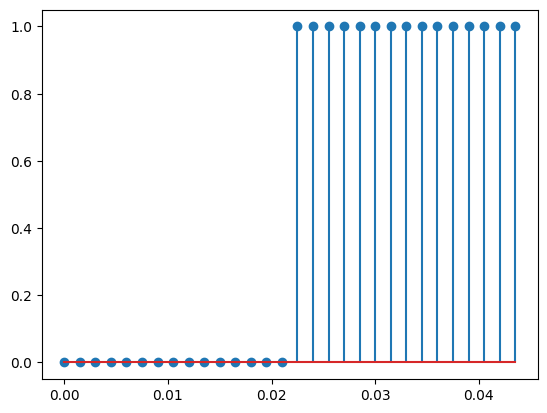

In [10]:
plt.stem(np.arange(N)*T, step)
plt.show()

построение графика на дискретном нормированном времени:

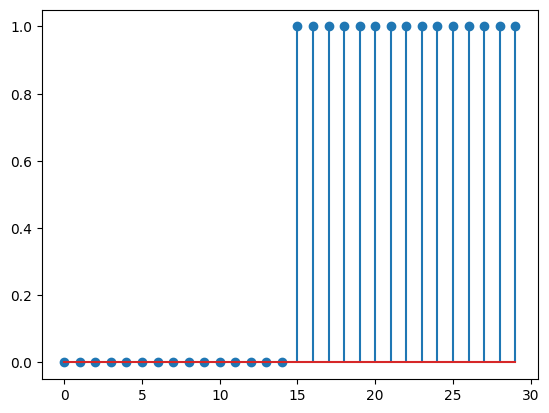

In [11]:
plt.stem(np.arange(N), step)
plt.show()

а. Соответствие между дискретным и аналоговым единичными скачками:

Аналоговая функция дискретного скачка определена на множестве действительных чисел, дискретная же - на множестве целых чисел. Дискретная функция равна единице в выделенной точке, аналоговая считается либо равной 0.5 либо неопределенной (хотя в пакете матлаб она так же равна единице)

b.Чему равна частота дискретизации дискретного единичного скачка:

$f_d = \frac{1}{T}$

In [12]:
1/T

666.6666666666666

## Выводы

Общий вывод по проделанной работе.